# Step 1: Import modules

In [ ]:
import numpy as np
import pandas as pd
import math
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew
from scipy.stats import kurtosis

# Step 2: Read the dataset

In [ ]:
gdp_lab=pd.read_csv("GDP_2000_2022.csv")
gdp_lab

,Year,GDP
0,2000,302.0
1,2001,315.0
2,2002,340.0
3,2003,389.0
4,2004,453.0
5,2005,537.0
6,2006,624.0
7,2007,730.0
8,2008,1065.0
9,2009,1132.0


# Step 3: Rename (Optional)

In [ ]:
#For convenience in calling the value, give the column section a new name.
gdp=gdp_lab.GDP

# Start doing the statistics

## 1. Finding mean of GDP

##### Average/Mean formula:
## $\bar{x}=\frac{\sum_{i=1}^{n}x_{i}}{n}$

In [ ]:
#using the ordinary method (by formula)
mean_or=sum(gdp)/len(gdp)
mean_or

1341.857142857143

In [ ]:
#using statistic library
st.mean(gdp)

1341.857142857143

## 2. Finding median of GDP

#### To find the median:
<ol>
<li>Arrange the data points from smallest to largest.</li>
<li>If the number of data points is odd, the median is the middle data point in the list.</li>
<li>If the number of data points is even, the median is the average of the two middle data points in the list.</li>
</ol>

In [ ]:
#finding if the number of data points is odd or even
n=len(gdp)

#arrange the data points from smallest to largest - using bubble sort
for i in range(n - 1):
    for j in range(0, n - i - 1):
        if gdp[j] > gdp[j + 1]:
            #swaping position
            gdp[j], gdp[j + 1] = gdp[j + 1], gdp[j]

#The middle index is also the median
middle_index = n // 2
median_or = gdp[middle_index]
median_or

1234.0

In [ ]:
#using statistic library
st.median(gdp)

## 3. Finding variance

#### Variance formula:
## $s^{2}=\frac {\sum_{i=1}^{n}{(x_{i}-\bar{x})}^{2}}{n-1} $

In [ ]:
#using ordinary method (formula)
var_or = sum((x - mean_or) ** 2 for x in gdp) // (n-1)
var_or

693745.0

In [ ]:
var=st.variance(gdp)
var

693745.4285714285

## 4. Finding standard deviation

#### Standard deviation formula:
## $s=\sqrt{s^{2}}=\sqrt{\frac {\sum_{i=1}^{n}{(x_{i}-\bar{x})}^{2}}{n-1}}$

In [ ]:
#using basic math library
stdev_or=math.sqrt(var)
stdev_or

832.9138182137624

In [ ]:
#using tool
st.stdev(gdp)

## 5. Finding mode

In [ ]:
#using the ordinary method by coding:

def find_mode(gdp):
    frequency = {}

    # Count the frequency of each number appearing
    for num in gdp:
        if num in frequency:
            frequency[num] += 1
        else:
            frequency[num] = 1

    # Find the highest frequency of occurrence
    max_frequency = max(frequency.values())

    # Create a list containing modes
    modes = []
    for num, freq in frequency.items():
        if freq == max_frequency:
            modes.append(num)

    return modes

mode_or = find_mode(gdp)
mode_or

In [ ]:
#using library:
st.mode(gdp)

> Explanation: Because there is no duplicate value, the algorithm can't find the mode, so it will return the first value of the dataset (with statistic library) or return all the dataset (in the ordinary way).

## 6. Finding quantiles

In [ ]:
q1 = np.quantile(gdp, 0.25)
q2 = np.quantile(gdp, 0.5)
q3 = np.quantile(gdp, 0.75)
print(q1)
print(q2)
print(q3)

## 7. Finding skewness

### Skewness formula:
## $skew[x]={\frac{n}{(n-1)(n-2)}}{\sum_{i=1}^{n}({\frac{x_{i}-\bar{x}}{s}})^{3}}$

In [ ]:
#using the formula:
skew_or=(n / ((n - 1) * (n - 2))) * sum(((x - mean_or) / stdev_or) ** 3 for x in gdp)
skew_or

0.19190526429277793

In [ ]:
#using library
skew(gdp,bias=False)

0.1919052642927779

## 8. Finding kurtosis

### Kurtosis formula:
## $kurtosis={\frac{n(n+1)}{(n-1)(n-2)(n-3)}}{\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})^{4}}{{s}^{4}}}$

In [ ]:
kurt_or = kurt = (n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))) * sum(((x - mean_or) / stdev_or) ** 4 for x in gdp) - 3 * ((n - 1) ** 2) / ((n - 2) * (n - 3))
kurt_or

In [ ]:
kurtosis(gdp)

In [ ]:
kurtosis(gdp,bias=False)

# Step 4: Visualizing the data

## 1. Boxplot

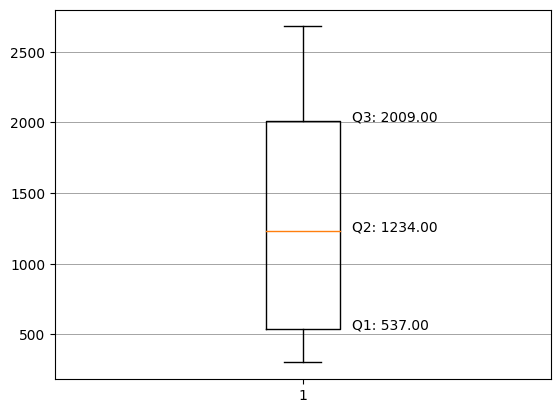

In [ ]:
#using plt lib
outlier_color = dict(markerfacecolor='red')
plt.boxplot(gdp_lab.GDP, flierprops=outlier_color)
plt.grid(True, axis='y', color='grey', linestyle='-', linewidth=0.5)
plt.text(1.1, q1, f'Q1: {q1:.2f}')
plt.text(1.1, q2, f'Q2: {q2:.2f}')
plt.text(1.1, q3, f'Q3: {q3:.2f}')
plt.show()

<Figure size 640x480 with 0 Axes>

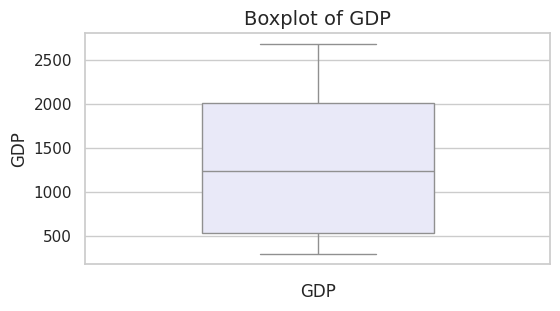

In [ ]:
#using seaborn
sns.set(style="whitegrid")
sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)
fig, ax=plt.subplots(figsize=(6,3))
sns.boxplot(gdp_lab['GDP'],color="lavender",width=0.5)
plt.title("Boxplot of GDP",fontsize=14)
plt.xlabel("GDP")
plt.show()

## 2. Histogram

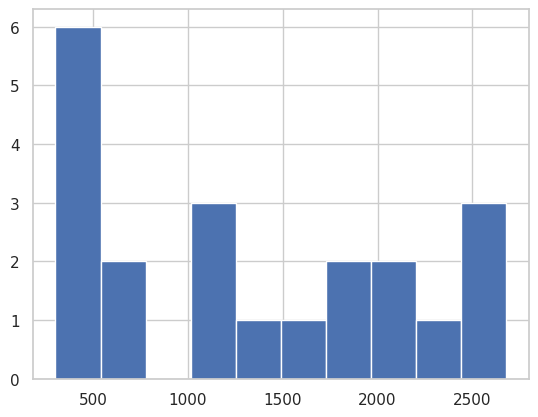

In [ ]:
plt.hist(gdp_lab.GDP)
plt.show()